## Ex2 - Simple & Multiple Regression using Scikit-Learn

*   Student ID: m301111001
*   Student Name: 宋明晏

### Import libraries

In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load dataset

In [6]:
df_insurance = pd.read_csv('/content/gdrive/Shareddrives/06_computer science/00_master_course/advanced/HW1_Creating the first regression model/insurance.csv')

In [18]:
df_insurance.shape

(1338, 7)

### Question 1 - 
Create a **Regression model** to predict the insurance charges of patients using their BMIs

#### LinearRegression
*   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [75]:
X = df_insurance['bmi'].values.reshape(-1,1)
y = df_insurance['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [76]:
from sklearn.linear_model import LinearRegression
lireg_uni = LinearRegression().fit(X_train, y_train)

In [77]:
lireg_uni.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [78]:
y_pred = lireg_uni.predict(X_test)

In [79]:
lireg_uni.score(X_train,y_train)

0.043763255699021175

In [80]:
lireg_uni_result = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
lireg_uni_result

,Actual,Predicted
0,6250.43500,10268.222626
1,13607.36875,13988.821473
2,12643.37780,14849.412162
3,19214.70553,15871.768019
4,10461.97940,13701.957909
...,...,...
330,27724.28875,15492.159094
331,1743.21400,12727.053168
332,1704.70015,10218.614641
333,30166.61817,10915.283295


In [81]:
# Intercept
intercept = lireg_uni.intercept_[0]
# Slope
slope = lireg_uni.coef_[0][0]

intercept,slope

(260.3509446629323, 431.37377935181064)

In [82]:
def regression_evaluation(test,pred):
  from sklearn import metrics
  MAE = metrics.mean_absolute_error(test,pred)
  MSE = metrics.mean_squared_error(test,pred)
  RMSE =  np.sqrt(metrics.mean_squared_error(test, pred))
  return MAE,MSE,RMSE

In [83]:
lireg_uni_metrics = regression_evaluation(y_test,y_pred)
lireg_uni_metrics

(8777.565144761144, 124135069.39311826, 11141.591869796624)

### Question 2 - 
Create a **Multiple Regression** model to predict the insurance charges of patients (using Age, BMI, number of children)

In [84]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [85]:
X = df_insurance[['age', 'bmi', 'children']]
y = df_insurance['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### LinearRegression

In [86]:
from sklearn.linear_model import LinearRegression
lireg_three = LinearRegression().fit(X_train, y_train)

In [87]:
y_pred = lireg_three.predict(X_test)

In [88]:
lireg_three_result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
lireg_three_result.reset_index()

,index,Actual,Predicted
0,945,11674.13000,18941.386024
1,1100,16776.30405,8238.019916
2,247,1986.93340,11042.908848
3,585,4779.60230,10953.182708
4,462,15230.32405,21803.588695
...,...,...,...
330,267,14590.63205,19684.572384
331,693,2352.96845,6557.366987
332,1122,46661.44240,19963.586237
333,699,3500.61230,13382.756213


In [89]:
lireg_three_metrics = regression_evaluation(y_test,y_pred)
lireg_three_metrics

(9285.992217641624, 133710582.35773538, 11563.329207357861)

### Question 3 - 
Using all of attributes (age, sex, bmi, children, smoker, region) to predict the insurance charges.

le = preprocessing.LabelEncoder()

*   le.fit()
*   le.classes_
*   le.transform
*   le.inverse_transform





In [90]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [91]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df_insurance["sex"].unique())
df_insurance["sex"] = le.transform(df_insurance["sex"])

le.fit(df_insurance["smoker"].unique())
df_insurance["smoker"] = le.transform(df_insurance["smoker"])

le.fit(df_insurance["region"].unique())
df_insurance["region"] = le.transform(df_insurance["region"])

df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### LinearRegression

In [92]:
X = df_insurance.iloc[:,:-1]
y = df_insurance['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [93]:
from sklearn.linear_model import LinearRegression
lireg_multi = LinearRegression().fit(X_train, y_train)

In [94]:
y_pred = lireg_multi.predict(X_test)

In [95]:
lireg_multi_result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
lireg_multi_result.reset_index()

,index,Actual,Predicted
0,945,11674.13000,13674.629137
1,974,2322.62180,5761.534550
2,320,4894.75330,5322.658118
3,910,2639.04290,3189.543667
4,516,27724.28875,4652.626885
...,...,...,...
330,210,1980.07000,3568.136068
331,704,8930.93455,9905.623869
332,1136,7623.51800,6977.469782
333,870,8457.81800,11967.282156


In [96]:
lireg_multi_metrics = regression_evaluation(y_test,y_pred)
lireg_multi_metrics

(4216.479133942186, 39748798.181114696, 6304.664795301547)

### Question 4 - 
Plot a barchart to compare the performance (MSE, RMSE, and MAE) of 3 models in questions 1 to 3

In [118]:
df_comparison = pd.DataFrame({'uni':lireg_uni_metrics,'three':lireg_three_metrics,'muti':lireg_multi_metrics})
df_comparison = df_comparison.transpose()

df_comparison = df_comparison.reset_index()
df_comparison.columns=['type','MSE', 'RMSE', 'MAE']
df_comparison

,type,MSE,RMSE,MAE
0,uni,8777.565145,1.241351e+08,11141.591870
1,three,9285.992218,1.337106e+08,11563.329207
2,muti,4216.479134,3.974880e+07,6304.664795


In [129]:
import pandas as pd
import plotly.express as px

px.bar(df_comparison, x='type', y=['MSE', 'RMSE', 'MAE'], barmode='group', title='comparision',log_y=True)

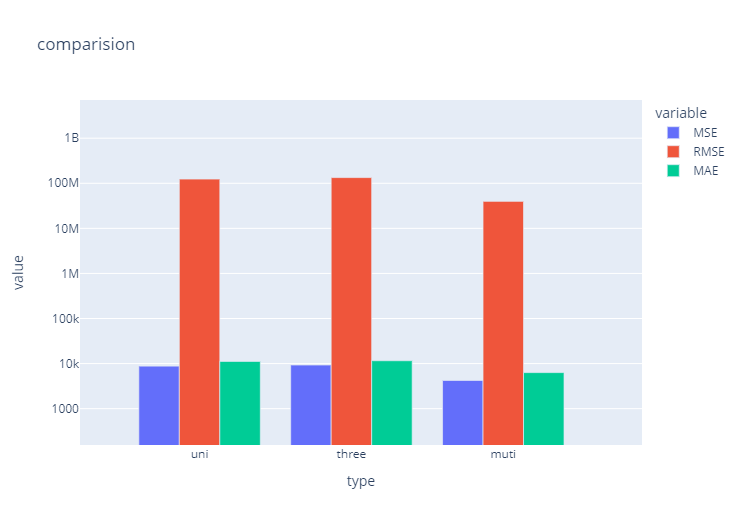

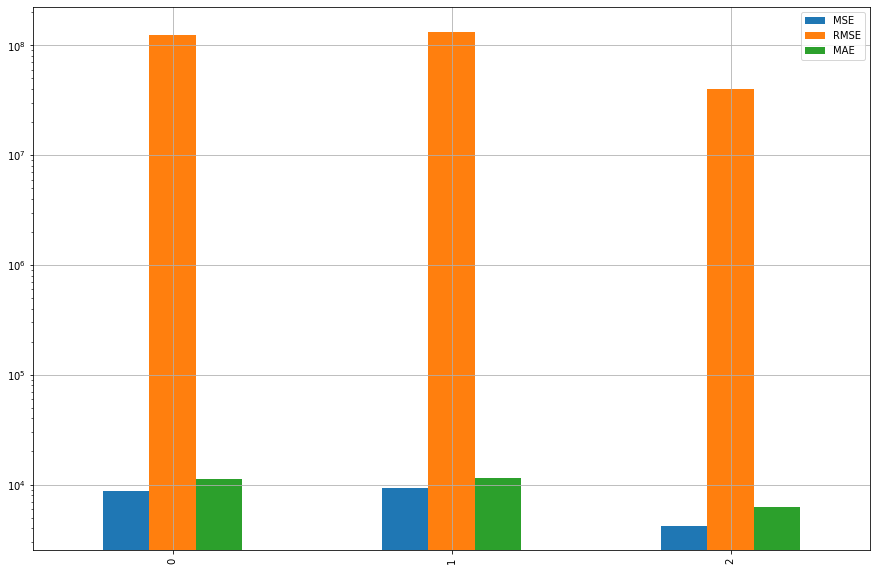

In [131]:
df_comparison.plot(kind='bar', figsize=(15,10),logy=True)
plt.grid(which='major')
plt.show()

## 3/4Discussion

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/Shareddrives/06_computer science/00_master_course/advanced/dataset/pima-indians-diabetes.csv')
df.head()

,Pregnancy,Glucose,BloodPressure,Tricep,Insulin,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df['Diabetes'].value_counts()

0    500
1    268
Name: Diabetes, dtype: int64

In [ ]:
X = df.drop('Diabetes', axis=1)
y = df.Diabetes

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
import numpy as np

In [ ]:
weights = {0:1.0, 1:1.01}
model_svc = svm.SVC(kernel='linear', gamma='scale',class_weight=weights,decision_function_shape='ovo')
print(np.mean(cross_val_score(model_svc, X, y, cv=5)))

0.7682794329853154


In [ ]:
weights = {0:1.0, 1:1.03}
clf_lr = LogisticRegression(class_weight=weights)
print(np.mean(cross_val_score(clf_lr, X, y, cv=5,n_jobs=-1)))
# output: 0.7734912146676853

0.7734912146676853


In [ ]:
weights = {0:1.0, 1:1.01}
clf_lr = LogisticRegression(penalty = 'l1' ,solver = "liblinear", class_weight = weights)
print(np.mean(cross_val_score(clf_lr, X, y, cv=5,n_jobs=-1)))
# output: 0.7734912146676853

0.7695866225277991


# skill 
*   reshape(-1,1)
*  https://blog.51cto.com/u_15054047/4171947



*   flatten()


